Here are some indicative types of  visualization you can perform. Please note that this is not an exhaustive list, you may add more
●	Come up with appropriate results and visuals for the following:
o	Analysis of percentage joined of offer released.

o	What are the key drivers that influence the candidate joining/not joining a company?

o	Are there specific locations where candidates are not joining?

o	Joining status depends on the duration to accept an offer?

o	Hike offered has an impact on joining status.?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## About DATA

 Data file contains information about all the candidates who were given the offer letter, and their joining status.

All important details regarding the Candidate and the given offering i.e. Duration to accept the offer by candidate, Notice period of previous employer,any joining bonus offered, difference between expected and offered CTC, Gender of candidate, years of experiance etc. has been provided.

In [2]:
HR_works_data=pd.DataFrame(pd.read_csv('hr_Hiring_details_with_joining_status_LOB.csv',index_col = 0))

In [3]:
HR_works_data.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,Location,Age,LOB_id,Status,LOB
Sno,,,,,,,,,,,,,,,,,,
1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,Noida,34.0,1,Joined,ERS
2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,Chennai,34.0,2,Joined,INFRA
3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,Noida,27.0,2,Joined,INFRA
4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,Noida,34.0,2,Joined,INFRA
5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,Noida,34.0,2,Joined,INFRA


The Data has some null values, so we replace them for bettwr analysis

In [4]:
HR_works_data['Age'].fillna(HR_works_data['Age'].median(),inplace=True)
HR_works_data['Offered band'].fillna('E1',inplace=True)

# Percentage of joined candidates

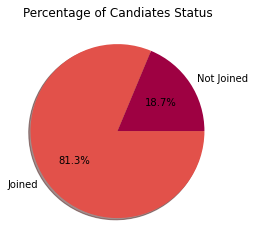

In [5]:
Status_type =HR_works_data.groupby('Status').agg('count')
Status_labels = Status_type['Candidate Ref'].sort_values().index 
Status_counts = Status_type['Candidate Ref'].sort_values()

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot( aspect=1, title='Percentage of Candiates Status')
plt.pie(Status_counts, labels=Status_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

We can infer from the pie chart that 81.3% of whom the job was offered have joined the firm and 18.7% have not joined

## Key Factors that are influencing the joining and not joining of Candidates

The dataset provides multiple factors, few categorical and few numerical

To find the the correlation between numerical factors can be done using a heat map

In [6]:
data_num=HR_works_data
encoded_status=pd.get_dummies(data_num['Status'])
data_num =data_num.join(encoded_status)

In [7]:
data_num=data_num.drop(['DOJ Extended', 'Offered band','Joining Bonus','Candidate relocate actual','Gender','Candidate Source','Location','LOB','Status','Pecent hike expected in CTC','Percent hike offered in CTC','Candidate Ref'], axis=1)

In [8]:
data_num.head()

,Duration to accept offer,Notice period,Percent difference CTC,Rex in Yrs,Age,LOB_id,Joined,Not Joined
Sno,,,,,,,,
1,14,30,42.86,7,34.0,1,1,0
2,18,30,180.00,8,34.0,2,1,0
3,3,45,0.00,4,27.0,2,1,0
4,26,30,0.00,4,34.0,2,1,0
5,1,120,0.00,6,34.0,2,1,0


<AxesSubplot:>

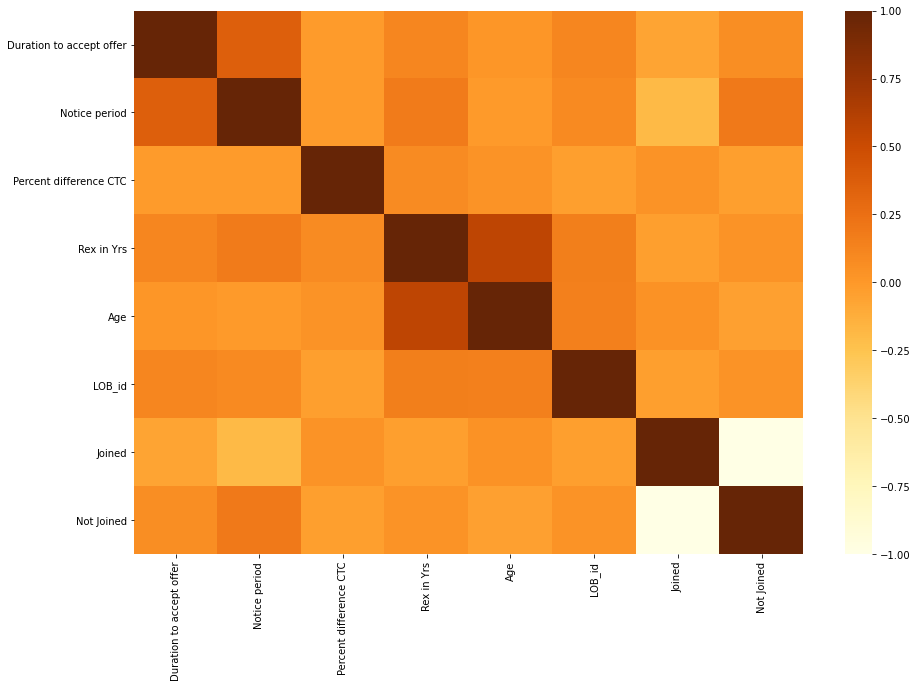

In [9]:
fig = plt.subplots(figsize=(15,10))
sns.heatmap(data_num.corr(),cmap='YlOrBr')

#### Observations:
    From the map we can infer that Not Joined is higly related to Notice period

In [10]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
HR_works_df=HR_works_data.copy()
#HR_works_df['Status_NotJoined'] = le.fit_transform(HR_works_df['Status'])
HR_works_df=HR_works_df.drop([ 'Candidate Ref','Pecent hike expected in CTC','Percent hike offered in CTC','LOB_id'], axis=1)


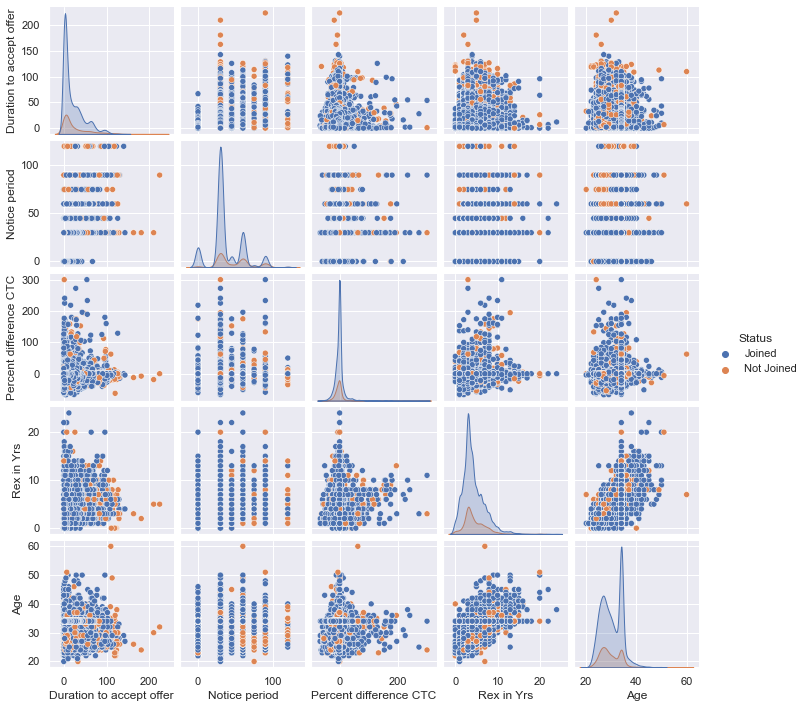

In [31]:
sns.color_palette("Set2")
sns.pairplot(HR_works_df,hue ='Status',size = 2,palette="deep")
plt.show()

#### Observations:

..........

## DOJ Extended influence on Status

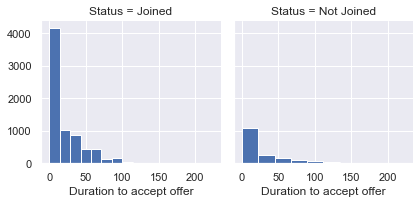

In [12]:
sns.set(style='darkgrid',color_codes=True)
sns.color_palette("Set2")
b=sns.FacetGrid(HR_works_data,col='Status')
b.map(plt.hist,'Duration to accept offer')

#### Observation:

....


<AxesSubplot:xlabel='DOJ Extended', ylabel='Status'>

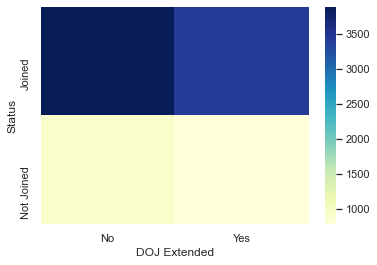

In [13]:
data_DOJ=HR_works_data.groupby('Status')['DOJ Extended'].value_counts().unstack().fillna(0)
sns.heatmap(data_DOJ, cmap='YlGnBu')

## Offered band Influence on Status


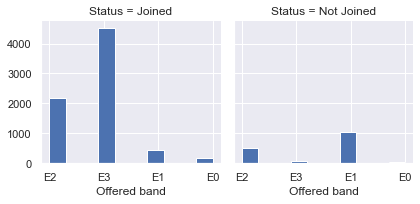

In [14]:
sns.set(style='darkgrid',color_codes=True)
Offered__band=sns.FacetGrid(HR_works_data,col='Status')
Offered__band.map(plt.hist,'Offered band')

<AxesSubplot:xlabel='Offered band', ylabel='Status'>

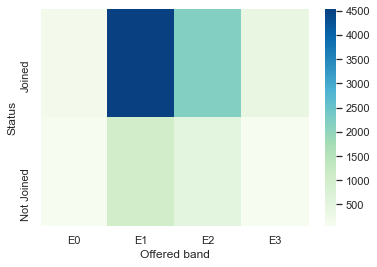

In [15]:
data_Source=HR_works_data.groupby('Status')['Offered band'].value_counts().unstack().fillna(0)
sns.heatmap(data_Source, cmap='GnBu') 

## Joining Bonus Influence on Status

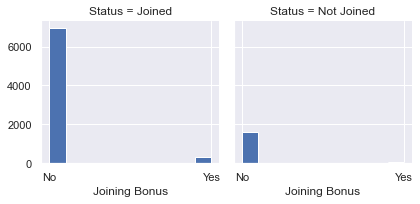

In [16]:
sns.set(style='darkgrid',color_codes=True)
Joining_Bonus=sns.FacetGrid(HR_works_data,col='Status')
Joining_Bonus.map(plt.hist,'Joining Bonus')

<AxesSubplot:xlabel='Joining Bonus', ylabel='Status'>

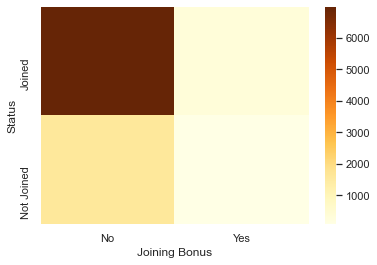

In [17]:
data_Source=HR_works_data.groupby('Status')['Joining Bonus'].value_counts().unstack().fillna(0)
sns.heatmap(data_Source, cmap='YlOrBr') 

## Candidate Relocation influence on Status

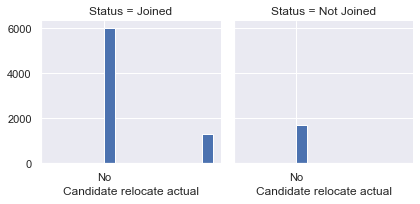

In [18]:
sns.set(style='darkgrid',color_codes=True)
Candidate_relocate=sns.FacetGrid(HR_works_data,col='Status')
Candidate_relocate.map(plt.hist,'Candidate relocate actual')

<AxesSubplot:xlabel='Candidate relocate actual', ylabel='Status'>

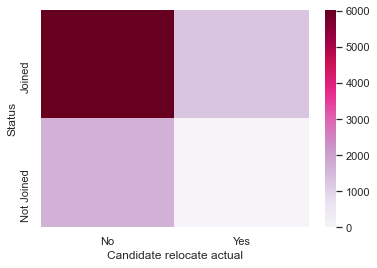

In [19]:
data_Source=HR_works_data.groupby('Status')['Candidate relocate actual'].value_counts().unstack().fillna(0)
sns.heatmap(data_Source, cmap='PuRd') 

## Gender influence on Status

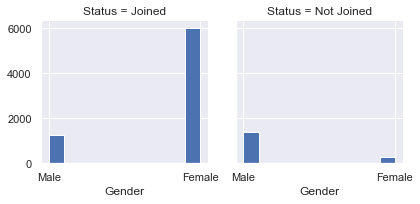

In [20]:
sns.set(style='darkgrid',color_codes=True)
Gender_b=sns.FacetGrid(HR_works_data,col='Status')
Gender_b.map(plt.hist,'Gender')

<AxesSubplot:xlabel='Gender', ylabel='Status'>

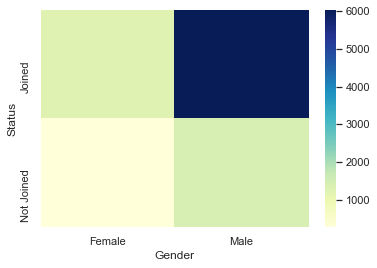

In [21]:
data_Source=HR_works_data.groupby('Status')['Gender'].value_counts().unstack().fillna(0)
sns.heatmap(data_Source, cmap='YlGnBu') 

## Location Influence on Status

<AxesSubplot:xlabel='Location', ylabel='Status'>

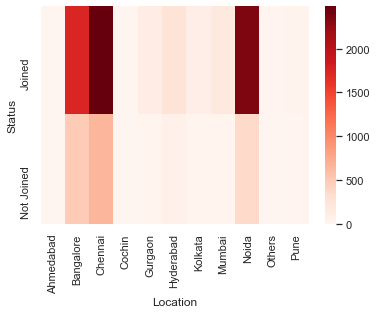

In [22]:
data_Source=HR_works_data.groupby('Status')['Location'].value_counts().unstack().fillna(0)
sns.heatmap(data_Source, cmap='Reds') 

## LOB Influence on status

<AxesSubplot:xlabel='LOB', ylabel='Status'>

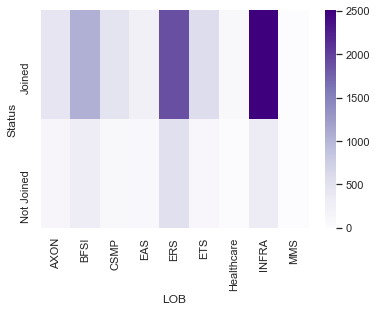

In [23]:
data_Source=HR_works_data.groupby('Status')['LOB'].value_counts().unstack().fillna(0)
sns.heatmap(data_Source, cmap='Purples') 

## Duration To Accept Offer influence on Status

<AxesSubplot:xlabel='Duration to accept offer', ylabel='Notice period'>

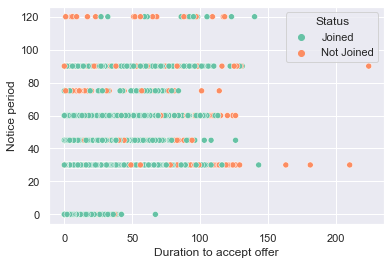

In [39]:
sns.scatterplot(data=HR_works_data, x="Duration to accept offer",y="Notice period", hue="Status",palette="Set2")

<AxesSubplot:xlabel='Candidate Ref', ylabel='Percent difference CTC'>

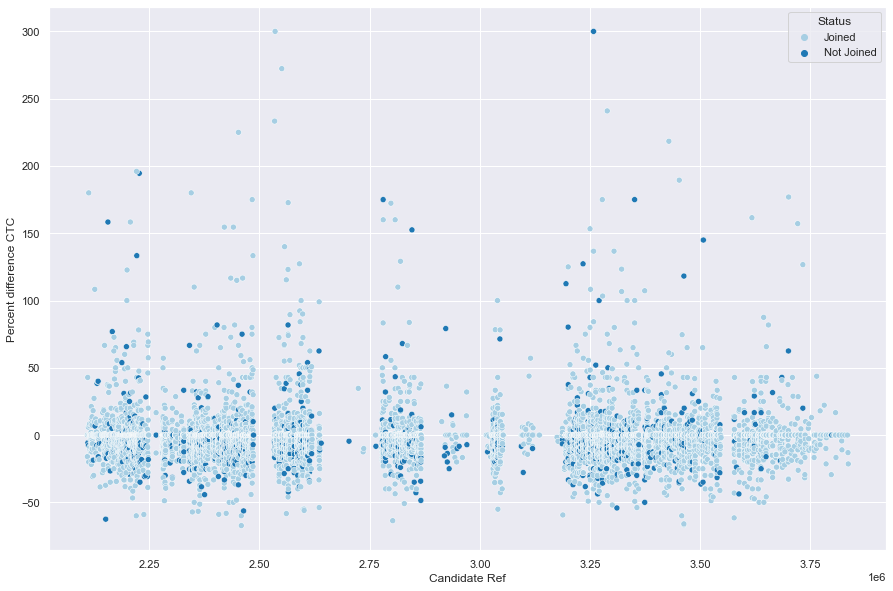

In [48]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(data=HR_works_data, x="Candidate Ref",y="Percent difference CTC", hue="Status",palette="Paired")